In [1]:
#Frank Liu 2022
import numpy as np
import matplotlib.pyplot as plt
import math
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# findSimLine(pointa, pointb, l, adj)
# Finds the simson line
# pointa, pointb - The two points of a side
# l - squared length of the side 
# opp - the vertex opposite to the side
def findSimLine(pointa, pointb, l, opp):
    #find parameterization of perpindicular line
    slope = np.flip(pointb-pointa)*math.sqrt(3)/2
    slope[0] = -slope[0]
    
    #Calculate midpoint and subtract the slope
    midpoint = (pointa+pointb)/2
    point1 = midpoint + slope
    point2 = midpoint - slope
    #check which point is further
    point1 -= opp
    point2 -= opp
    if np.dot(point1,point1)>np.dot(point2,point2):
        return point1
    else:
        return point2

In [3]:
#takes 3 numpy 1x2 arrays representing the x,y coordinates of each point
def findFPoint(point1, point2, point3):
    a = np.subtract(point1, point2)
    b = np.subtract(point2, point3)
    c = np.subtract(point3, point1)
    #Length of sides squared
    a = np.dot(a,a)
    b = np.dot(b,b)
    c = np.dot(c,c)
    
    #Edge Case, Deformed triangle: all three points are colinear or coincide (same point)
    if a == 0:
        #point 1 and point 2 are the same
        return point1
    elif b==0:
        #point 2 and point 3 are the same
        return point2
    elif c==0:
        #point 3 and point 1 are the same
        return point3

    #Angles using law of cosines (a^2=b^2+c^2-2bc(cosA))
    A = np.arccos((b+c-a)/(2*math.sqrt(b*c)))
    B = np.arccos((a+c-b)/(2*math.sqrt(a*c)))
    C = np.arccos((a+b-c)/(2*math.sqrt(a*b)))
    
    MaxAngle = (2/3)*math.pi
    #print(f'MaxAngle: {MaxAngle}')
    if A>=MaxAngle:
        return point3
    if B>=MaxAngle:
        return point1
    if C>=MaxAngle:
        return point2
    
    #Line 1
    #Calculate third vertex point of equilateral (point 2 and 3)
    line1 = findSimLine(point2, point3, b, point1)
    
    #Line 2
    #Calculate third vertex point of equilateral (point 2 and 1)
    line2 = findSimLine(point2, point1, a, point3)

    #Systems of Equation Matrix for t_1, t_2
    #Solve for t_2 using REF
    mat = np.matrix([line1,-line2,point3-point1]).T
    mat[0]/= line1[0]
    mat[1] -= line1[1]*mat[0]
    t_2 = mat[1,2]/mat[1,1]
    
    return t_2*line2+point3

Fermat Point: [0.57735027 0.57735027]


<function matplotlib.pyplot.show(close=None, block=None)>

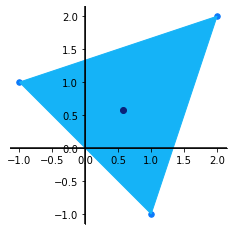

In [5]:
#Change coordinates here:
point1 = np.array([1,-1])
point2 = np.array([-1,1])
point3 = np.array([2,2])

#Calls our helper function
FPoint = findFPoint(point1,point2,point3)
vertices = np.array([point1,point2,point3])
print(f'Fermat Point: {FPoint}')

#Plotting:
plt.figure()
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
x= ax.spines['left'].set_position('zero')

triangle = plt.Polygon(vertices, color= '#15b3f7')
ax.add_patch(triangle)
plt.scatter(vertices[:, 0],vertices [:, 1], s= 30, color = '#0b79fa')
plt.plot(FPoint[0],FPoint[1],'o', color='#0a2179')
plt.axis('scaled')
plt.show